# Random Forest

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

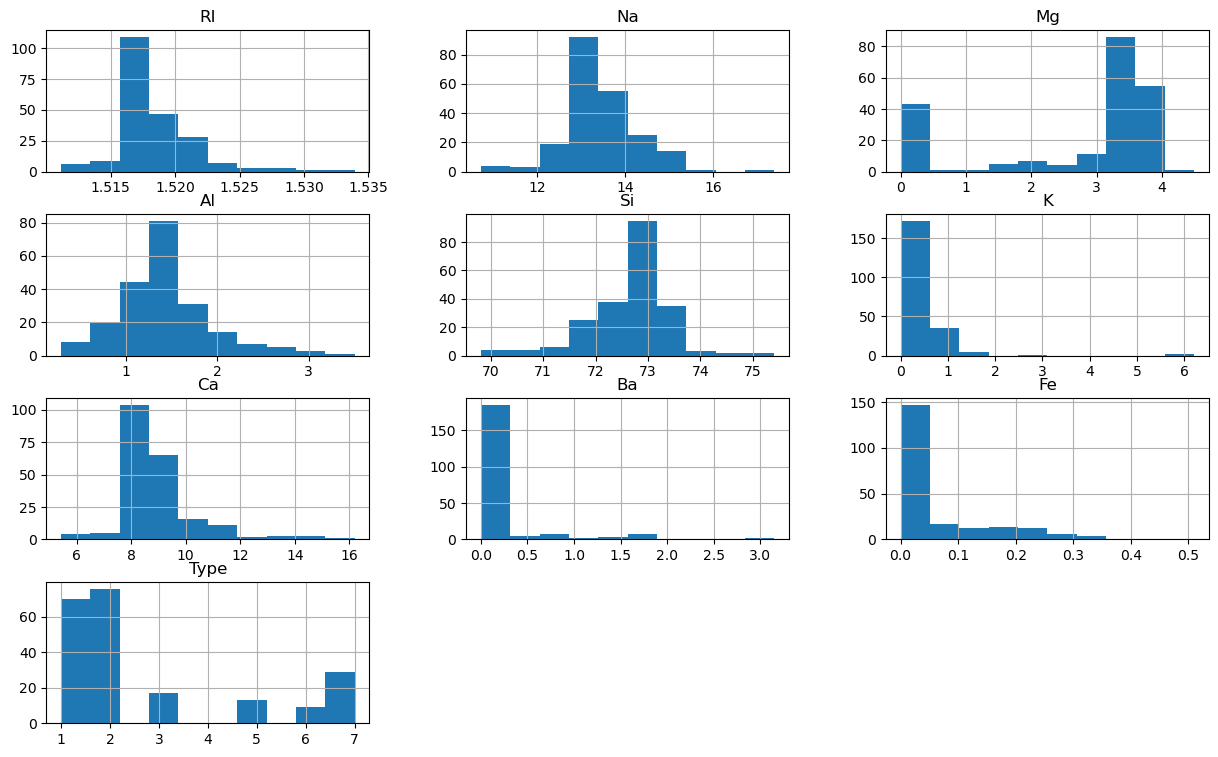

In [6]:
df.hist(figsize=(15,9))

<Axes: >

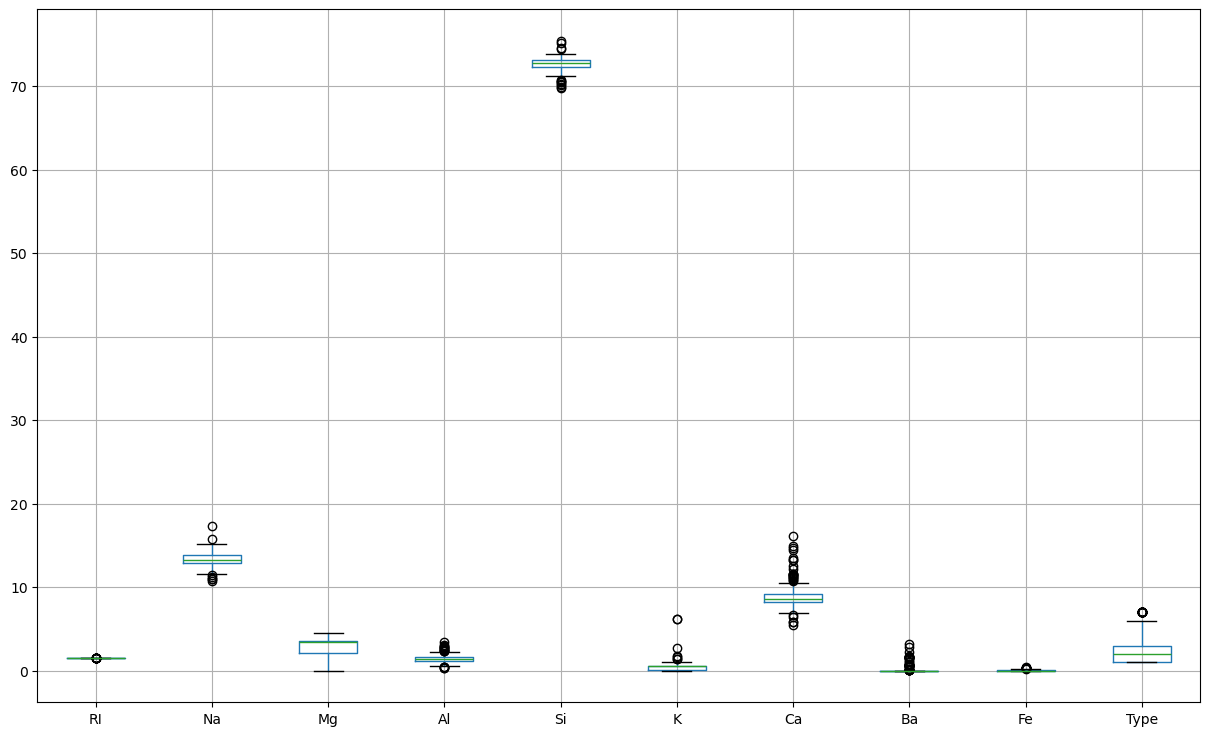

In [7]:
df.boxplot(figsize=(15,9))

In [8]:
corr =df.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


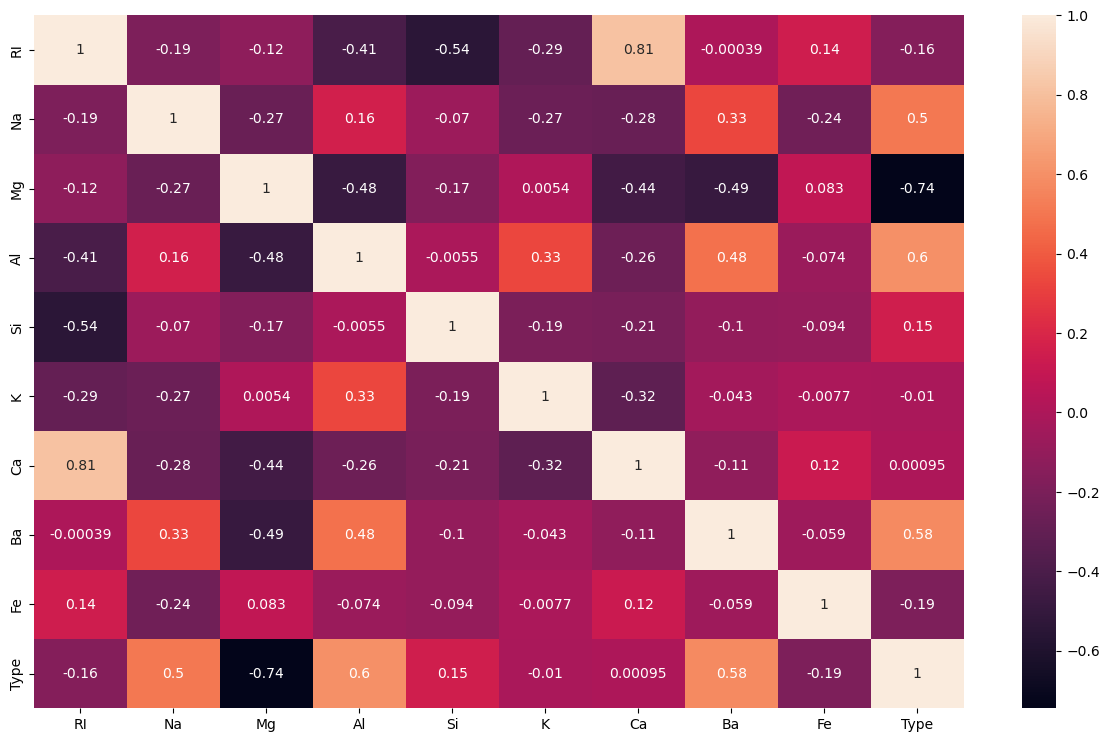

In [10]:
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True)
plt.show()

### Data Preprocessing

In [9]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### Implementation of Random Forest Model 

In [11]:
feature=df.drop("Type",axis=1)
feature

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [12]:
target=df["Type"]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.3,random_state=27)

In [14]:
rf_model=RandomForestClassifier(n_estimators=50,max_features=3)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=50)

In [16]:
y_predict=rf_model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.80      0.75      0.77        16
           2       0.74      0.80      0.77        25
           3       0.50      0.50      0.50         4
           5       0.75      0.60      0.67         5
           6       0.75      1.00      0.86         3
           7       1.00      0.92      0.96        12

    accuracy                           0.78        65
   macro avg       0.76      0.76      0.75        65
weighted avg       0.79      0.78      0.78        65



### Bagging and Boosting Methods

In [18]:
decision_tree= DecisionTreeClassifier()
rf_model_0= BaggingClassifier(decision_tree,n_estimators=50)
rf_model_0.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

In [19]:
y_predict_0=rf_model_0.predict(x_test)
print(classification_report(y_test,y_predict_0))

              precision    recall  f1-score   support

           1       0.82      0.88      0.85        16
           2       0.77      0.68      0.72        25
           3       1.00      0.50      0.67         4
           5       0.75      0.60      0.67         5
           6       0.50      1.00      0.67         3
           7       0.86      1.00      0.92        12

    accuracy                           0.78        65
   macro avg       0.78      0.78      0.75        65
weighted avg       0.80      0.78      0.78        65



### Boosting

In [22]:
estimator=DecisionTreeClassifier()
rf_model_1=AdaBoostClassifier(estimator,n_estimators=50)
rf_model_1.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [23]:
y_predict_1=rf_model_1.predict(x_test)
print(classification_report(y_test,y_predict_1))

              precision    recall  f1-score   support

           1       0.62      0.81      0.70        16
           2       0.72      0.52      0.60        25
           3       0.20      0.25      0.22         4
           5       0.75      0.60      0.67         5
           6       0.50      1.00      0.67         3
           7       0.91      0.83      0.87        12

    accuracy                           0.66        65
   macro avg       0.62      0.67      0.62        65
weighted avg       0.69      0.66      0.66        65



1. #### Bagging and Boosting

Bagging (Bootstrap Aggregating)
it trains multiple models (typically of the same type) on different subsets of the training data, created by sampling with replacement (bootstrapping).   
Goal: Reduces variance (overfitting) by averaging the predictions of the individual models.   
importance:
Models are trained independently in parallel.   
Each model receives equal weight in the final prediction.   
Effective for models with high variance, such as decision trees.   
Example: Random Forest

Boosting
it trains models sequentially, where each subsequent model focuses on correcting the errors made by the previous models.   
Goal: Reduces bias by iteratively improving the model's performance.   
importance:
Models are trained sequentially, with each model learning from the mistakes of its predecessors.   
Models are weighted based on their performance, with better-performing models receiving higher weights.   
Effective for models with high bias, such as simple decision stumps.
Examples: AdaBoost, Gradient Boosting, XGBoost

2. #### Handling Imbalance in Data

Imbalanced data occurs when the number of samples in one class significantly outweighs the number of samples in other classes. This can lead to biased models that favor the majority class. Here are some common techniques to handle imbalanced data:   

Resampling:
Oversampling: Increases the number of samples in the minority class by duplicating existing samples or generating synthetic samples (e.g., SMOTE).   
Undersampling: Reduces the number of samples in the majority class by randomly removing samples.
Data Augmentation: Creates new synthetic samples for the minority class by applying transformations (rotations, flips, zooming) to existing samples.   
Cost-Sensitive Learning: Assigns different misclassification costs to different classes, giving more weight to the minority class.   
Ensemble Methods: Combines multiple models trained on different subsets of the data or with different sampling strategies.   
Class Weighting: Assigns different weights to different classes during model training, giving more importance to the minority class.   
